# Assignment 4

In this assignment, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

__Exercise 1.1.__ Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [165]:
from urllib2 import Request, urlopen
import requests
import requests_cache
import pandas as pd
import json
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
requests_cache.install_cache('food_cache')

def ndb_search(Search_terms,fg='',ds=''):
    '''
    input: search term(string), food group(default as'',string) and data source(default as'',string)
    output: return the search result items as a list (for 0 items, return an empty list).
    search and return all matched food
    '''
    api_key='kqp23AsUZ7SAlDhm02E2kuorJhOJMduwHi1dTAqP'
    url="https://api.nal.usda.gov/ndb/search"
    r=requests.get(url,params={
        'q' : Search_terms,
        'api_key': api_key,
        'format':'json',
        'fg':fg,
        'ds':ds
    })
    s=r.json()
    try:
        return s['list']['item']
    except :
        return []
ndb_search("quail eggs")

[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]

__Exercise 1.2.__ Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

In [166]:
fresh=pd.read_csv('fresh.csv')
search_term=fresh.loc[:,"food"].str.replace('_',' ')

In [167]:
temp1=[ndb_search(x,ds='Standard Reference',fg='Fruits and Fruit Juices') for x in search_term]
temp2=[ndb_search(x,ds='Standard Reference',fg='Vegetables and Vegetable Products') for x in search_term]
temp = [ x for x in (temp1+temp2) if x!=[] ]
food_number=reduce((lambda x,y: pd.merge(pd.DataFrame(x),pd.DataFrame(y),how='outer')),temp)

In [168]:
food=food_number[food_number['name'].str.contains(', raw')]
food=food[-food['name'].str.contains('leaves|juice')]
food=food.drop_duplicates('ndbno')# remove repeated record

In [169]:
fresh['ndbno']=''
fresh['name'] =''
for x in fresh.index:
    term=fresh.ix[x,'food'].replace('_',' ')
    term0=fresh.ix[x,'form']
    t=food.ix[:,'name'].str.lower()
    if ' ' in term:
        a=term.split(' ')
        term1=''.join([a[1],' ',a[0]])## flip around by '_'
        s1=food[t.str.contains(term.replace(' ','.*'))|t.str.contains(term1.replace(' ','.*'))]
    else:
        s1=food[t.str.contains(term)]
    if len(s1)==0 and term.endswith('s'):## plural
        s1=food[t.str.contains(term[:-1])|t.str.contains(term[:-2])|t.str.contains(term[:-3])]
    if len(s1)==0: continue
    if term0=='Fresh1':
        fresh.ix[x,['name','ndbno']]=food.ix[s1['ndbno'].idxmin()]
    else:
        y=term0[5:-1]## pull out all the info in form(not fresh1)
        s2=s1[s1['name'].str.contains(y)]## extract from previous slicing output
        if(len(s2)>0):
            fresh.ix[x,['name','ndbno']]=food.ix[s2['ndbno'].idxmin()]
            food.drop(s2['ndbno'].idxmin(),inplace = True)## make sure don't find same results from differnet form
        else:
            fresh.ix[x,['name','ndbno']]=food.ix[s1['ndbno'].idxmin()]
            food.drop(s1['ndbno'].idxmin(),inplace = True)

In [170]:
fresh

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno,name
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,09326,"Watermelon, raw"
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit,09181,"Melons, cantaloupe, raw"
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit,09218,"Tangerines, (mandarin oranges), raw"
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit,09316,"Strawberries, raw"
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit,09279,"Plums, raw"
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,09200,"Oranges, raw, all commercial varieties"
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit,09302,"Raspberries, raw"
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit,09286,"Pomegranates, raw"
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit,09266,"Pineapple, raw, all varieties"
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit,09021,"Apricots, raw"


This is a complicated problem and here's my method. First, I use my search function(ndb_search) in exericise1.1 to get data from API. By restricting database from standard reference(unbranded), and group either Vegetables and Vegetable Products or Fruits and Fruit Juices, I perform the 1st filtering. Then I transform the search results into a dataframe and slicing all the rows with name variables contains ', raw' stored as dataframe food to do the 2nd filtering. At last I use a for loop a go through column 'food' in fresh.csv(do some appropriate change to meet the requirement) and extract the rows in dataframe food which contain that kind of food, if there're multiple rows corresponding to the same food , I choose the row with least ndb number as the results.(if multiple food in fresh.csv exsit, I would use form to do further slicing). At last, except kiwi and collard_greens, I find all the matches.

__Exercise 1.3.__ Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [171]:
def ndb_report(ndbno):
    '''
    input: ndbno unicode
    output: nutrition list
    search and requests a basic food report. 
    '''
    url="https://api.nal.usda.gov/ndb/V2/reports"
    api_key='kqp23AsUZ7SAlDhm02E2kuorJhOJMduwHi1dTAqP'
    r=requests.get(url,params={
        'ndbno': ndbno,
        'api_key': api_key
    })
    return r.json()['foods'][0]['food']['nutrients']
r=ndb_report('09279')
r[0]

{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}

__Exercise 1.4.__ Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

In [172]:
fresh['nutrition']=''
for x in fresh.index:
    num=fresh.ix[x,'ndbno']
    if num!='':
        r=ndb_report(num)[1]['value']
        fresh.ix[x,'nutrition']=r

In [173]:
fresh2=fresh[fresh.ix[:,'ndbno']!='']
fresh2.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno,name,nutrition
0,Fresh1,0.333412,0.52,0.330693,0.212033,watermelon,fruit,09326,"Watermelon, raw",30
1,Fresh1,0.535874,0.51,0.374786,0.393800,cantaloupe,fruit,09181,"Melons, cantaloupe, raw",34
2,Fresh1,1.377962,0.74,0.407855,0.759471,tangerines,fruit,09218,"Tangerines, (mandarin oranges), raw",53
3,Fresh1,2.358808,0.94,0.319670,0.802171,strawberries,fruit,09316,"Strawberries, raw",32
4,Fresh1,1.827416,0.94,0.363763,0.707176,plums,fruit,09279,"Plums, raw",46


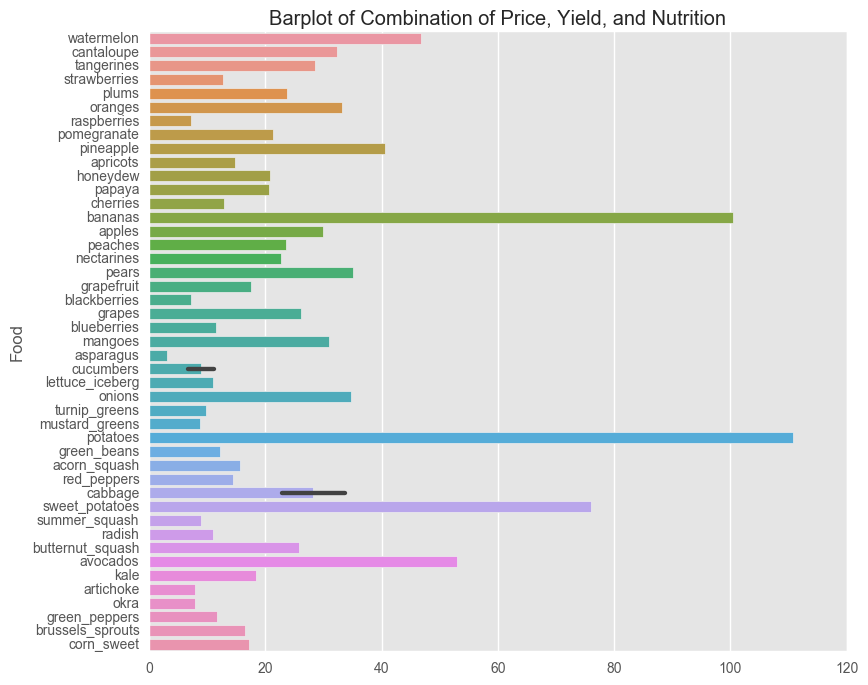

In [174]:
import seaborn as sns
#Initialize the matplotlib figure
plt.subplots(figsize=(9, 8))
combo=fresh2.ix[:,'nutrition'].astype(float)/fresh2.ix[:,'price_per_lb'].astype(float)*fresh2.ix[:,'yield'].astype(float)
sns.barplot(combo,fresh2.ix[:,'food'])
plt.title('Barplot of Combination of Price, Yield, and Nutrition')
plt.ylabel('Food')
plt.show()

It seems that potatoes are the best(using energy as the index of nutrition) according to the barplot .